## GARCH Model Fundamentals

1. Observe volatility clustering

Volatility clustering is frequently observed in financial market data, and it poses a challenge for time series modeling.

In this exercise, you will get familiar with the S&P 500 daily price dataset. You will calculate daily returns as the percentage price changes, plot the results and observe its behavior over time.

In [9]:
# Import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
#  Get price of S&P500
tickers = ['^GSPC']
sp_price = web.get_data_yahoo(tickers, start = '2005-01-01',end = '2020-12-01')
sp_price = sp_price['Adj Close']
# Ensure the prices are sorted by Date
sp_price = sp_price.sort_values(by='Date')
print(sp_price.head())

Symbols           ^GSPC
Date                   
2005-01-03  1202.079956
2005-01-04  1188.050049
2005-01-05  1183.739990
2005-01-06  1187.890015
2005-01-07  1186.189941


Symbols           ^GSPC    Return
Date                             
2020-11-17  3609.530029 -0.479193
2020-11-18  3567.790039 -1.156383
2020-11-19  3581.870117  0.394644
2020-11-20  3557.540039 -0.679256
2020-11-23  3577.590088  0.563593
2020-11-24  3635.409912  1.616167
2020-11-25  3629.649902 -0.158442
2020-11-27  3638.350098  0.239698
2020-11-30  3621.629883 -0.459555
2020-12-01  3662.449951  1.127119


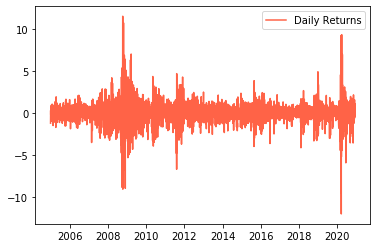

In [10]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price.pct_change())

# View the data
print(sp_price.tail(10))

# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [14]:
# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = np.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = np.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Daily volatility:  1.25%
Monthly volatility:  5.72%
Annual volatility:  19.83%
